In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import pandas as pd

target = 'popularity'
features = ['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','mode','speechiness','tempo']
data_path = "../data/data_by_decade/data_from_"
data_path_all = "../data/data.csv"

In [2]:
dp=9
est=95

decades = [str(i) for i in range(20,100,10)]
decades.append("00")
decades.append("10")
decade_imps = {}
for decade in decades:    
    df = pd.read_csv(data_path + decade + "s.csv")
    
    X = df[features]
    y = df[target]

    forestRegressor = RandomForestRegressor(n_estimators=est, max_depth=dp, random_state=0) 

    forestRegressor.fit(X, y)
    
    feature_regressor_importances_df = pd.DataFrame(
        {"feature": features, "importance": forestRegressor.feature_importances_}
    ).sort_values("importance", ascending=False)
    
    decade_imps[decade] = feature_regressor_importances_df


In [3]:
feature_imps = {}
for feature in features:
    temp = []
    for decade in decades:
        temp_df = decade_imps[decade]
        temp_df2 = temp_df[temp_df["feature"] == feature]
        temp.append(temp_df2["importance"].iloc[0])        
            
    feature_imps[feature] = temp

In [4]:
feature_imps

{'valence': [0.05738629904449422,
  0.0564979128237689,
  0.07204715642084941,
  0.04934241660266176,
  0.07050880076953056,
  0.06894726264763965,
  0.06405244114031237,
  0.06500269211657628,
  0.07314308164766152,
  0.05078823153687652],
 'acousticness': [0.08808928707574135,
  0.15646076845135046,
  0.09507066394312197,
  0.27451242153917593,
  0.2382505940530079,
  0.08278553433782589,
  0.06586345887077774,
  0.06922395381437725,
  0.07785918694792156,
  0.09282537948830223],
 'danceability': [0.11036205840019887,
  0.08850876506001466,
  0.10718854068189956,
  0.07163454011512649,
  0.08111028284252764,
  0.11127681657730291,
  0.09565129173281832,
  0.088580670199487,
  0.0999060096967888,
  0.11172299180861099],
 'duration_ms': [0.16580845378584078,
  0.1404390415360693,
  0.10963198869756573,
  0.08351017389370198,
  0.11436720495418795,
  0.1430232627369423,
  0.2006218683555204,
  0.17002251346819472,
  0.12600509217546577,
  0.23696220109585517],
 'energy': [0.106403712990

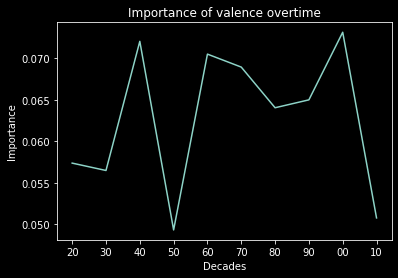

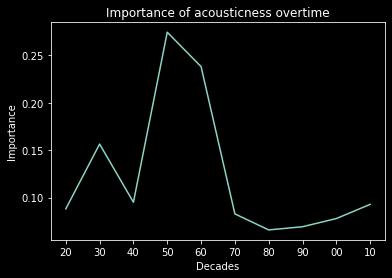

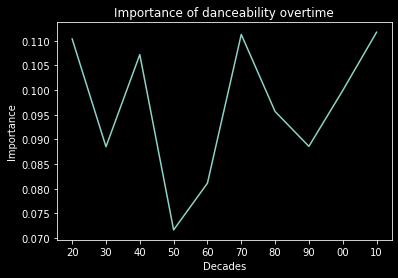

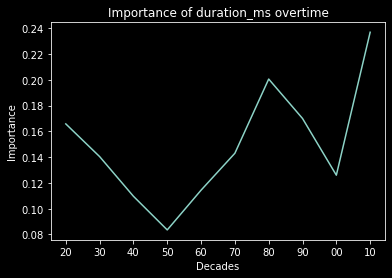

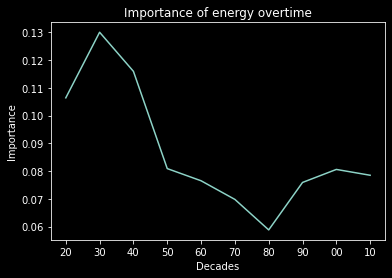

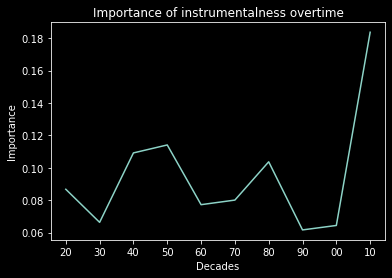

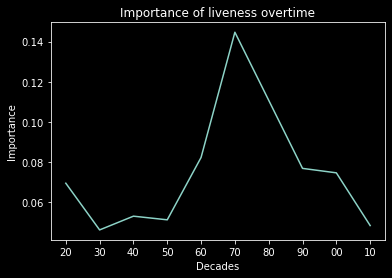

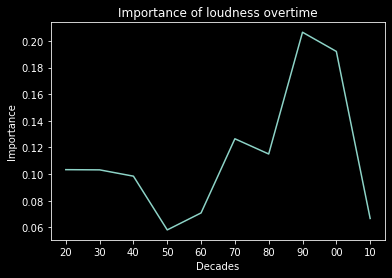

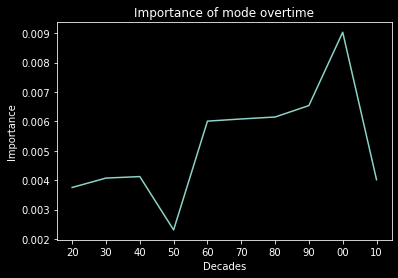

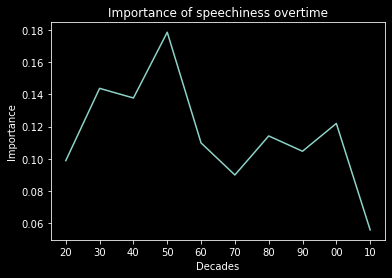

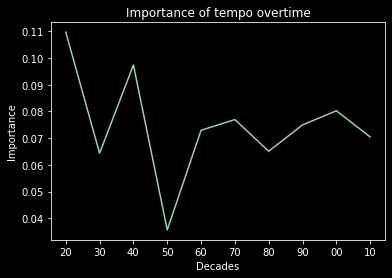

In [5]:
from matplotlib import style
style.use('dark_background')

for feature in features:
    plt.figure()
    plt.title(f"Importance of {feature} overtime")
    plt.xlabel("Decades")
    plt.ylabel("Importance")
    plt.plot(decades, feature_imps[feature])